<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [3]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

In [29]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification/10users'

In [2]:
def add_elem_to_dict(dictionary, element, filecount): #добавляет элемент в словарь и возвращает число уникальных сайтов 
    if element in dictionary:
        return filecount
    else:
        dictionary[element] = [filecount+1, 0]
        return filecount+1
def add_freq_to_dict(dictionary, data): #заполнение частот посещенных сайтов
    for key in dictionary:
        a = dictionary[key][0] # a - id сайта
        dictionary[key] = (a, data[a])

In [3]:
def give_spare_matrix(data):
    X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values
    X_sparse = csr_matrix((np.ones(X.size, dtype=int), X.reshape(-1), np.arange(X.shape[0] + 1) * X.shape[1]))[:,1:]
    return X_sparse, y

In [15]:
def prepare_sparse_train_set_window(csv_files_mask, session_length, window_size):
    # Получаем список файлов, удовлетворяющих заданной маске
    site_dict = {} #{site - (id,count)}
    list_of_files = glob(csv_files_mask)
    data = [] #массив для записи данных
    file_counter = 0
    for path in list_of_files:
        all_sites_from_file = []
        # Читаем файлы из списка
        with open(path, 'r') as fp:
            list_of_sites = []
            for line in fp:
                # Читаем строки из файла, каждую строку разбиваем на части
                list_of_tokens = line.strip().split(',') #[id,timestamp,site]
                # Проверяем, что строка не пустая
                if len(list_of_tokens) != 3:
                    break
                # Добавляем элемент в словарь
                file_counter = add_elem_to_dict(site_dict, list_of_tokens[2], file_counter) #число уникальных сайтов на момент считывания строки
                all_sites_from_file.append(site_dict[list_of_tokens[2]][0]) #id сайтов в данном файле
                user_id = int(list_of_tokens[0]) #id_user           
        n = len(all_sites_from_file) #число посещенных сайтов из данного файла (число строк в файле)
        ind = 0
        while True: # блок деления по сессиям
            if ind + session_length > n-1: #если выходим за границу текущего файла при прибавлении session_length
                data.append(all_sites_from_file[ind:n] + [0 for _ in range(session_length - n + ind)] + [user_id])
                ind += window_size
                if ind<n:
                    data.append(all_sites_from_file[ind:n] + [0 for _ in range(session_length - n + ind)] + [user_id])
                break
            data.append(all_sites_from_file[ind:ind+session_length] + [user_id])
            ind += window_size
            if ind >= n:
                break
    df = pd.DataFrame(data,columns = ['site'+str(x) for x in range(1, session_length+1)] + ['target'])
    df = df.drop_duplicates()
    add_freq_to_dict(site_dict, np.unique(df.drop(['target'], axis = 1).values.ravel(), return_counts=True)[1])
    x_sparse, y = give_spare_matrix(df)
    return x_sparse, y

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [16]:
path_to_csv_files = 'capstone_websites_data/3users_toy/*'
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(path_to_csv_files, session_length=5, window_size=3)

In [17]:
X_toy_s5_w3.todense()

matrix([[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3], dtype=int64)

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [20]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window('capstone_websites_data/%dusers/*' % num_users, 
                                                          session_length, window_size)
            data_lengths.append(X_sparse.shape[0])
            with open(os.path.join('capstone_websites_data', 
                                   'X_sparse_{}users_s{}_w{}.pkl'.format(num_users,session_length,window_size)), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join('capstone_websites_data', 'y_{}users_s{}_w{}.pkl'.format(num_users,session_length,window_size)), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)

Wall time: 46.6 s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [25]:
print (data_lengths)
print (len(np.unique(data_lengths)))

[13554, 19296, 18490, 17611, 26879, 25683, 24376, 22539, 132629, 189120, 186063, 181281, 264111, 259440, 251786, 237928]
16


## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [26]:
PATH_TO_DATA = 'capstone_user_identification'
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [27]:
train_df.head()

,user_id,1,2,3,4,5,6,7,8,9,10
session_id,,,,,,,,,,,
1,1,1,2,3,4,3,3,4,3,5,3
2,1,6,7,8,9,3,10,11,12,13,14
3,1,14,4,14,14,15,16,6,17,18,14
4,1,19,20,19,14,14,14,14,21,22,23
5,1,24,14,15,25,26,27,28,29,30,29


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 1 to 14061
Data columns (total 11 columns):
user_id    14061 non-null int64
1          14061 non-null int64
2          14061 non-null int64
3          14061 non-null int64
4          14061 non-null int64
5          14061 non-null int64
6          14061 non-null int64
7          14061 non-null int64
8          14061 non-null int64
9          14061 non-null int64
10         14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [29]:
train_df['user_id'].value_counts()

7     2796
3     2204
8     1868
6     1712
9     1643
2     1022
4      802
1      760
5      720
10     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [30]:
num_unique_sites = [np.unique(train_df.values[i, 1:]).shape[0]  for i in range(train_df.shape[0])]

In [31]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

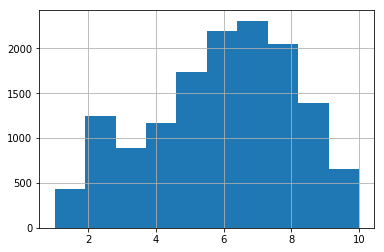

In [32]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

Populating the interactive namespace from numpy and matplotlib


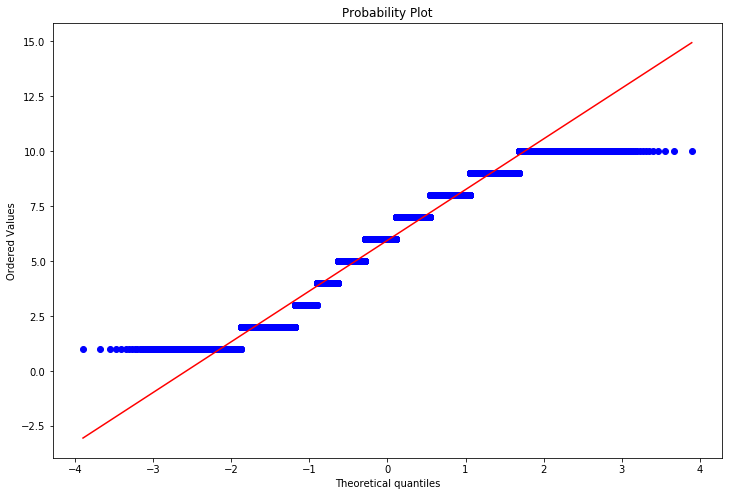

In [33]:
# Q-Q график
%pylab inline
pylab.figure(figsize=(12,8))
stats.probplot(num_unique_sites, dist="norm", plot=pylab)
pylab.show()

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [34]:
from scipy import stats

In [35]:
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(num_unique_sites)) 

Shapiro-Wilk normality test, W-statistic: 0.954693, p-value: 0.000000


Критерий Шапиро-Уилка отклоняет гипотезу нормальности распределения т.к. у нас обрезаны хвосты распределения, на Q-Q графие видна линейная зависимость. Т.е распределение нормальное.

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [36]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int') #если меньше 10уникальных сайтов, то 1, иначе 0

In [37]:
print ('1:', sum(has_two_similar)/float(len(has_two_similar))) #доля нулей и единиц
print ('0:', 1-sum(has_two_similar)/float(len(has_two_similar)))

1: 0.9537017281843396
0: 0.046298271815660375


Проверяем гипотезу: H0: доля единиц = 0.95, H1: доля единиц больше 0.95

In [38]:
pi_val = stats.binom_test(sum(has_two_similar), n=len(has_two_similar), p=0.05, alternative='greater')
print(pi_val)

0.0


Вывод: Гипотеза о том, что доля единиц равна 95% отвергается в пользу гипотезы, что доля единиц больще 95% 

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [40]:
wilson_interval = proportion_confint(sum(has_two_similar), len(has_two_similar), method = 'wilson')
print ('wilson_interval [{}, {}]'.format(wilson_interval[0], wilson_interval[1]))

wilson_interval [0.950102884141, 0.957052737723]


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [20]:
with open('capstone_user_identification/site_freq_150users.pkl', 'rb') as f:
    site_freq = pickle.load(f)
list_freq = site_freq.items()
mas_freq = np.array(list_freq)
pd_freq = pd.DataFrame(mas_freq, columns=['site', 'id_friq'])
pd_freq['id'] = pd_freq['id_friq'].map(lambda x: x[0])
pd_freq['freq'] = pd_freq['id_friq'].map(lambda x: x[1])
pd_freq.drop('id_friq', axis=1, inplace=True)
pd_freq = pd_freq.sort_values(by=['freq'], ascending=False)
pd_freq.head()

,site,id,freq
23175,www.google.fr,1,64785
20160,www.google.com,3,51320
14219,www.facebook.com,41,39002
4851,apis.google.com,2,29983
23521,s.youtube.com,181,29102


In [14]:
pd_freq_filter = pd_freq[pd_freq['freq']>=1000]
print(pd_freq.shape)
print(pd_freq_filter.shape)

(27797, 3)
(165, 3)


In [15]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
fig = go.Figure([go.Bar(x=pd_freq_filter['site'], y=pd_freq_filter['freq'].values), ])
fig.show()

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

In [24]:
# Точечная оценка средней частоты появления сайта в выборке
print (pd_freq['freq'].mean())

49.2682663597


In [32]:
with open('capstone_user_identification/site_freq_10users.pkl', 'rb') as f:
    site_freq_10 = pickle.load(f)
list_freq_10 = site_freq_10.items()
n_samples = len(list_freq_10) #число сайтов в исходной выборке по 10 пользователям (число генерируемых подвыборок)
print(n_samples)

4913


In [18]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [33]:
list_mean = map(np.mean, get_bootstrap_samples(pd_freq['freq'].values, n_samples=n_samples)) #генерируем выборки и находим mean
print ('mean_mean: ', np.mean(list_mean)) #считаем среденее значение mean в выборках
print ('std_mean: ', np.std(list_mean)) #считаем средене квадратичное отклонение в выборках

mean_mean:  49.24228963172791
std_mean:  4.485247155868196


In [36]:
mean_list_mean  = np.mean(list_mean)
std_list_mean = np.std(list_mean)
n = len(list_mean)

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [50]:
stat_intervals(list_mean, alpha=0.05)

array([41.13956902, 58.78173184])

In [60]:
from statsmodels.stats.weightstats import _tconfint_generic
print ("mean 95%% confidence interval",_tconfint_generic(mean_list_mean, std_list_mean/float(np.sqrt(n)), dof=n-1, alpha=0.05, alternative='two-sided'))

mean 95%% confidence interval (49.11684036834126, 49.367738895114556)


## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.